In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st
import math

# Set path for crash data file
monroe_county_crash_path = "data/monroe-county-crash-data2003-to-2015.csv"

# Read the crash data 
df = pd.read_csv(monroe_county_crash_path, encoding="ISO-8859-1").dropna() # Remove NaN

# Display the data table for preview
df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


# Data Cleaning

In [4]:
# Data cleaning work will be placed in this cell. Please hold on this aspect. 
# Remove 0 and 1 from Lat/Long 
df = df[(df["Latitude"] != 1) & (df["Latitude"] != 0)]
df.shape

# Remove Reported Location Column 
df.drop(columns=["Reported_Location"], inplace=True)

# Set all figsizes to a standard 
plt.rcParams['figure.figsize'] = (16,8)

# Preliminary Data Exploration 


### Question for Kylee: What are the most frequent primary factors causing a collision? 
>- **Theory:** Aggressive driving is a strong causal factor in accidents.
- Chart count of collisions based on primary factor (do a value_count first to see the top reasons and then do a groupby)
>- **Theory:** Some primary factors vary in frequency based on the time of day and day of the week.
- Plot Primary factors (colors), x-axis is day of the week, y-axis is time of day (Alcohol/illegal drug usage, glare, cell phone usage)    


### Attempt #1: Bar Chart Showing Primary Factors

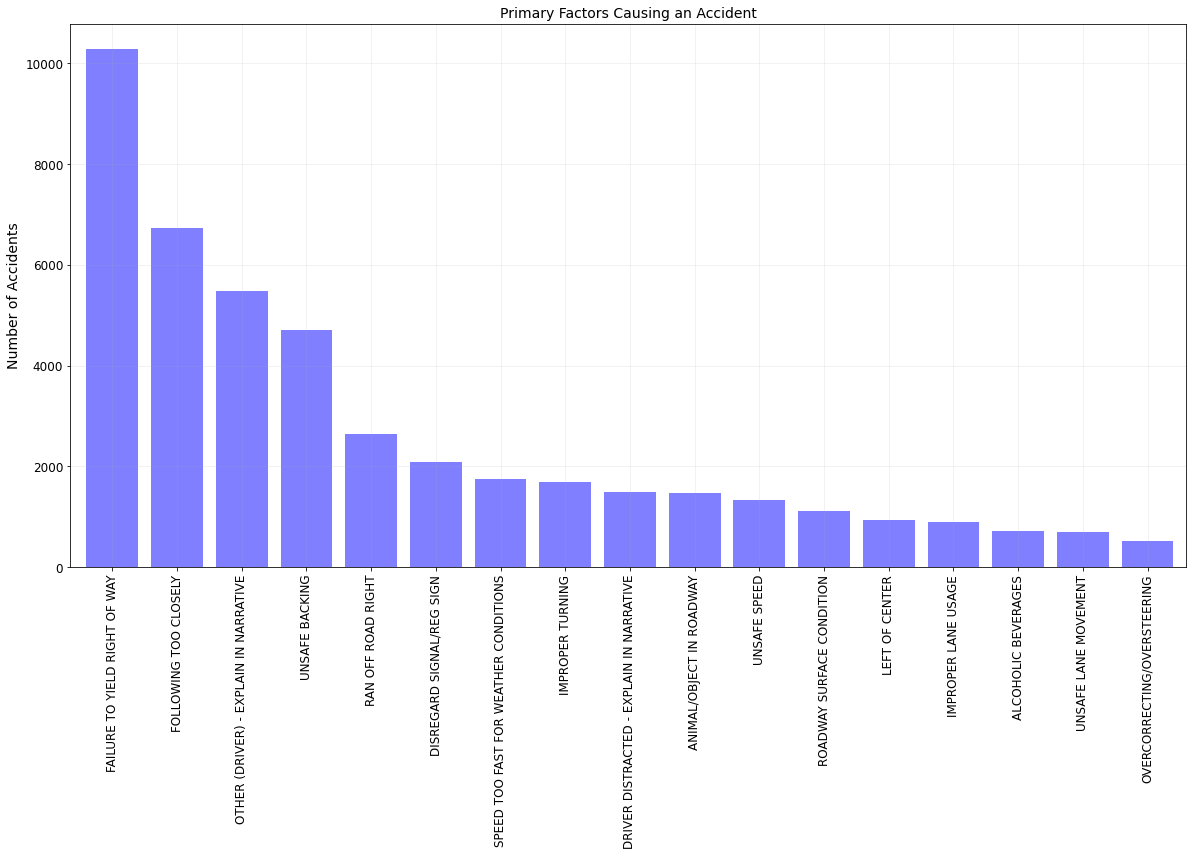

In [9]:
# Create a data frame to store the .value_counts() for primary factors causing an accident, showing results with more than 500 counts
factors_df = pd.DataFrame({
    "Primary Factor Causing Accident": df["Primary Factor"].value_counts()
})
factors_df = factors_df.loc[factors_df["Primary Factor Causing Accident"] >=500]

# Set x and y values 
x_values = factors_df.index 
y_values = factors_df["Primary Factor Causing Accident"]

# Set x axis and tick locations
x_axis = np.arange(len(factors_df))
tick_locations = [value+0.4 for value in x_axis]

# Plot the bar chart 
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_values, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, factors_df.index, rotation="vertical", fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(y_values)+500)
plt.grid(alpha=0.2)

# Set a Title and labels
#plt.xlabel("Primary Factor")
plt.title("Primary Factors Causing an Accident", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.show()

### Attempt #2: Bar Chart Showing Primary Factors

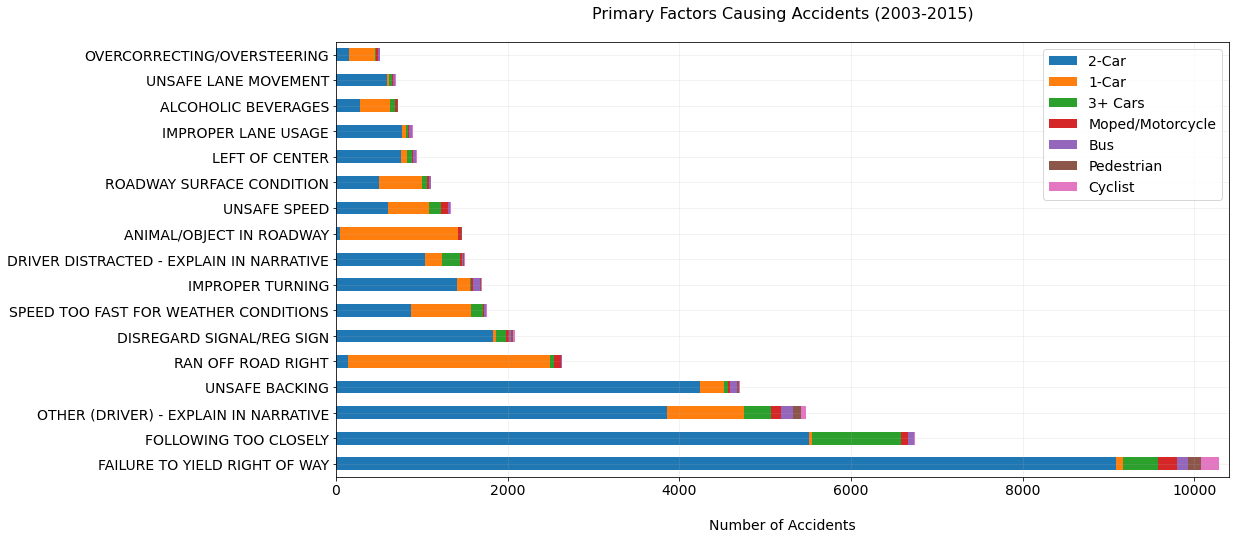

In [4]:
# Using .value_counts() for primary factors causing an accident, setting aside factors that caused more than 500 accidents
factors_df = pd.DataFrame({
    "Primary Factor Causing Accident": df["Primary Factor"].value_counts()
})
factors_df = factors_df.loc[factors_df["Primary Factor Causing Accident"] >=500]

# Initiating other items needed for the loop 
collision_types = ['2-Car', '1-Car', '3+ Cars', 'Moped/Motorcycle', 'Bus', 'Pedestrian', 'Cyclist']
factors_index = factors_df.index
collision_df_all = pd.DataFrame(index=factors_index)
collision_df_all = collision_df_all.reset_index().rename(columns={"index": "Primary Factor"})

# Go through all the collision types to fill out our df 
for collision in collision_types: 
    collision_df = df.loc[df["Collision Type"] == collision, ["Primary Factor", "Collision Type"]] 
    collision_df = collision_df.groupby("Primary Factor")
    collision_df = collision_df.count().reset_index()
    collision_df.rename(columns={"Collision Type": collision}, inplace=True)
    collision_df_all = pd.merge(collision_df_all, collision_df, how="left", on="Primary Factor")
    collision_df_all = collision_df_all.set_index("Primary Factor") 

# Plot and label the figure 
collision_df_all.plot(kind="barh", stacked=True, fontsize=14)
plt.grid(alpha=0.2)
plt.xlim(0, 10400)
plt.legend(fontsize=14)
plt.ylabel("")
plt.xlabel("""
Number of Accidents""", fontsize=14)
plt.title("""Primary Factors Causing Accidents (2003-2015)
""", fontsize=16)
plt.show()

### Attempt #1: Scatter Plot Showing Timed Primary Factors

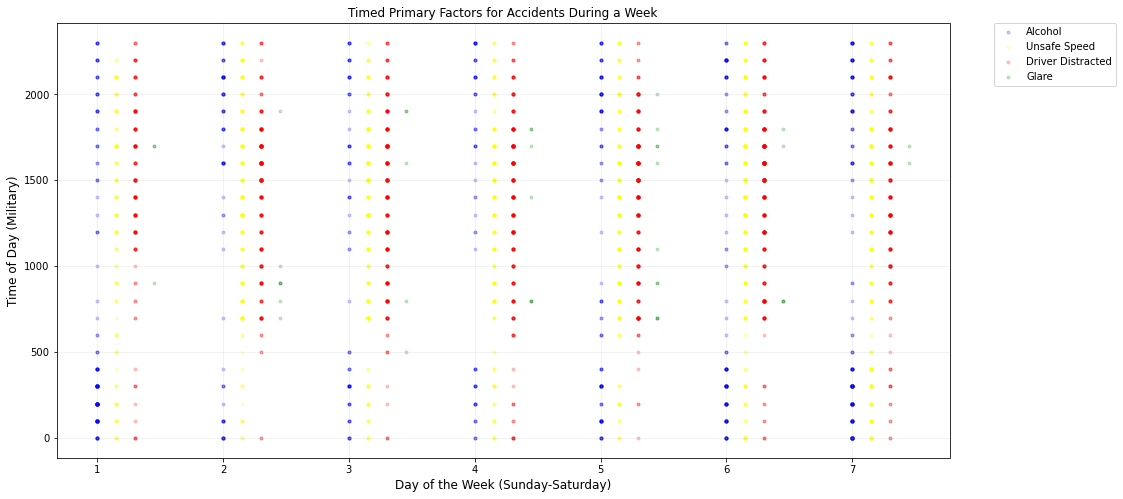

In [5]:
# Scatter plot: Primary factor (colors), x-axis is day of the week, y-axis is time of day (Alcohol/illegal drug usage, glare, cell phone usage)
# First factor 
alcohol_df = df.loc[df["Primary Factor"] == "ALCOHOLIC BEVERAGES", ["Day", "Hour"]]
alcohol_x_values = alcohol_df["Day"]
alcohol_y_values = alcohol_df["Hour"]

# Second factor 
distracted_df = df.loc[df["Primary Factor"] == "DRIVER DISTRACTED - EXPLAIN IN NARRATIVE", ["Day", "Hour"]]
distracted_x_values = distracted_df["Day"]
distracted_y_values = distracted_df["Hour"]

# Third factor 
glare_df = df.loc[df["Primary Factor"] == "GLARE", ["Day", "Hour"]]
glare_x_values = glare_df["Day"]
glare_y_values = glare_df["Hour"]

# Fourth factor 
speed_df = df.loc[df["Primary Factor"] == "UNSAFE SPEED", ["Day", "Hour"]]
speed_x_values = speed_df["Day"]
speed_y_values = speed_df["Hour"]

# Label the scatter plot 
plt.title("Timed Primary Factors for Accidents During a Week")
plt.ylabel("Time of Day (Military)", fontsize=12)
plt.xlabel("Day of the Week (Sunday-Saturday)", fontsize=12)
plt.grid(alpha=0.2)

# Plot the scatter plot 
plt.scatter(alcohol_x_values, alcohol_y_values, marker=".", alpha=0.20, facecolors="blue", edgecolors="blue", label='Alcohol')
plt.scatter(speed_x_values+0.15, speed_y_values, marker=".", alpha=0.20, facecolors="yellow", edgecolors="yellow", label='Unsafe Speed')
plt.scatter(distracted_x_values+0.30, distracted_y_values, marker=".", alpha=0.20, facecolors="red", edgecolors="red", label='Driver Distracted')
plt.scatter(glare_x_values+0.45, glare_y_values, marker=".", alpha=0.20, facecolors="green", edgecolors="green", label='Glare')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #https://matplotlib.org/3.3.3/tutorials/intermediate/legend_guide.html
plt.show()

### Attempt #2: Scatter Plot Showing Timed Primary Factors

<ipython-input-6-c6ba033e00a2>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection="polar")


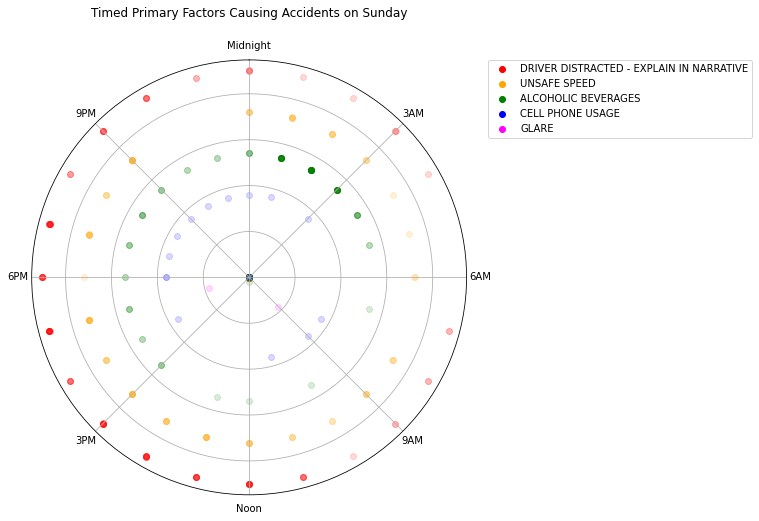

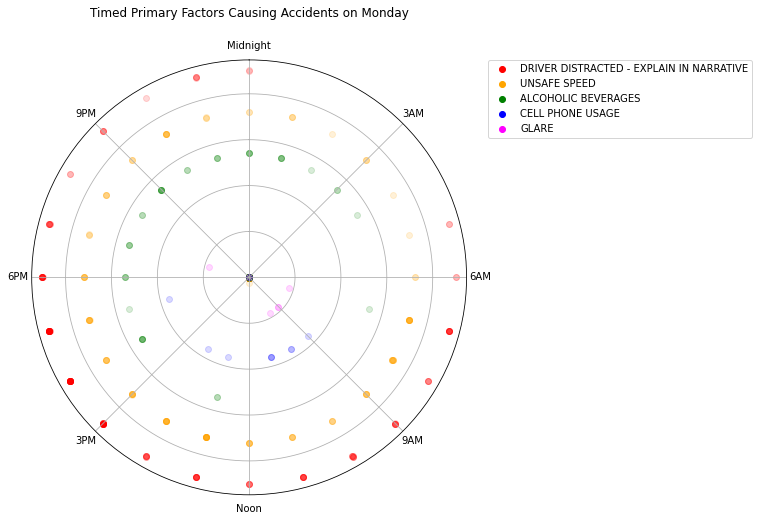

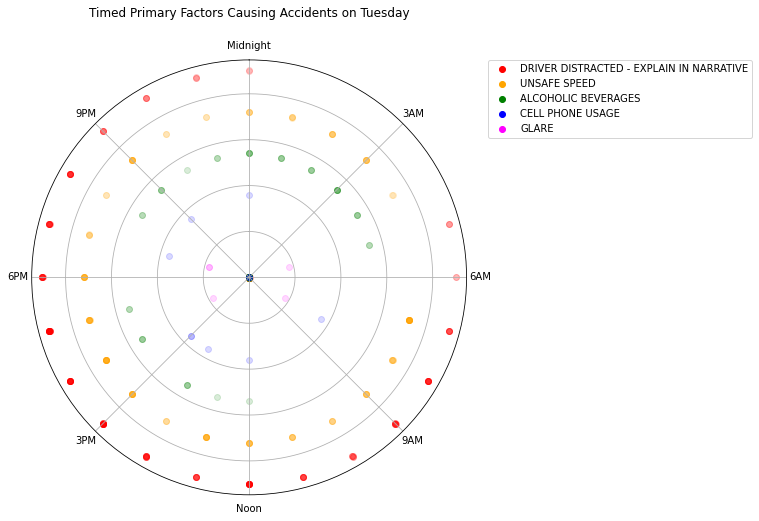

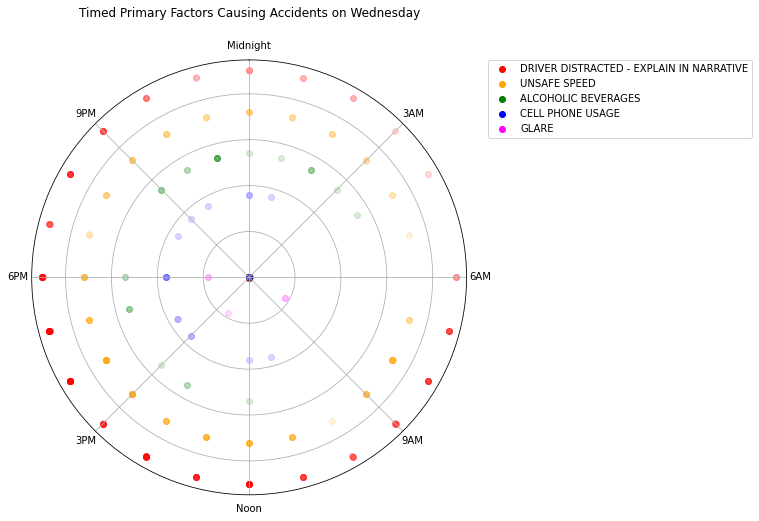

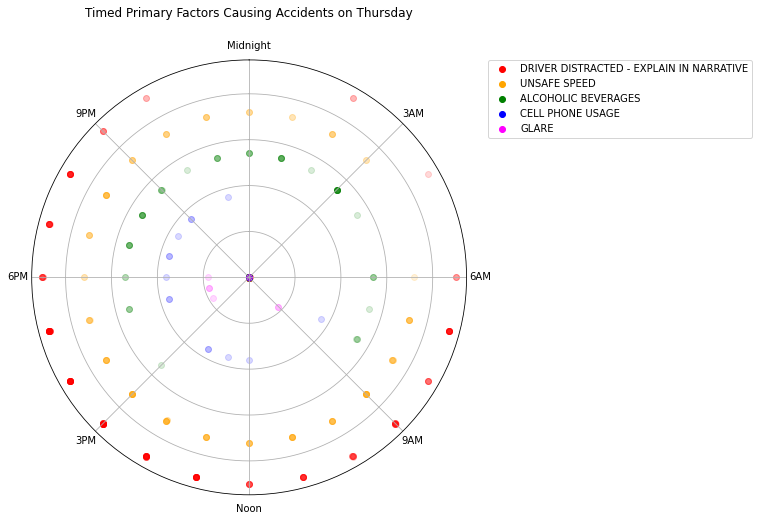

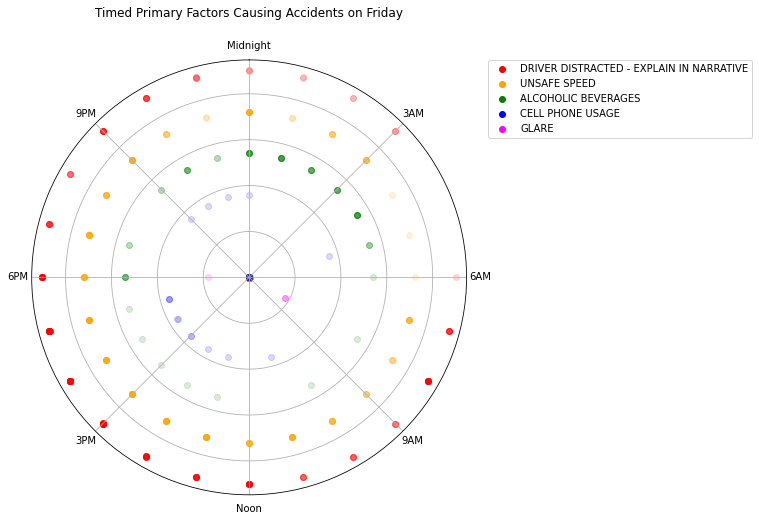

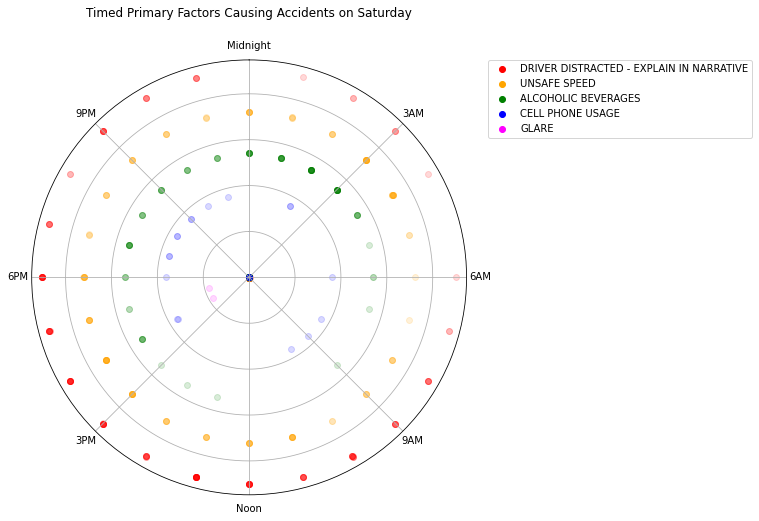

In [6]:
# Setting aside items to be iterated through, style options: https://matplotlib.org/tutorials/introductory/customizing.html
days = [1, 2, 3, 4, 5, 6, 7]
day_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_index = 0 
factors = ["DRIVER DISTRACTED - EXPLAIN IN NARRATIVE", "UNSAFE SPEED", "ALCOHOLIC BEVERAGES", "CELL PHONE USAGE", "GLARE"]
colors = ["red", "orange", "green", "blue", "magenta"] # https://matplotlib.org/3.1.0/gallery/color/named_colors.html
scalar = [1.0, 0.8, 0.6, 0.4, 0.2, 0.0] 

# Initiating loop to produce 7 different graphs for the days 
for day in days: 
    i = 0  
    fig = plt.figure()
    day_df = df.loc[df["Day"] == day]
    
    # Initiating loop to map the multiple primary factos at play 
    for factor in factors:
        factor_df = day_df.loc[day_df["Primary Factor"] == factor, ["Hour", "Master Record Number"]]
        x_values = (factor_df["Hour"] / 2400) * 360 * (math.pi/180) # convert to radians manually, where midnight is 0 degrees
        y_values = (factor_df["Master Record Number"]) # scaling the chart to 1 
        ax = fig.add_subplot(111, projection="polar") 
        ax.scatter(x_values, y_values * scalar[i], c=colors[i], alpha=0.15, label=factor)
        i += 1 
    
    # Labeling the scatter plot 
    ax.set_xticklabels(['Midnight', '3AM', '6AM', '9AM', 'Noon', '3PM', '6PM', '9PM'])
    ax.set_yticklabels([])
    ax.set_theta_zero_location("N")  # theta=0 at the top, https://stackoverflow.com/questions/49805975/how-do-you-reverse-the-axis-and-set-the-zero-position-for-a-polar-plot-in-matplo
    ax.set_theta_direction(-1)  # theta increasing clockwise
    # Fixing legend 
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    for lh in leg.legendHandles: 
        lh.set_alpha(1) # increasing opacity for the legend, https://stackoverflow.com/questions/12848808/set-legend-symbol-opacity-with-matplotlib
    # Finishing with a dynamic title
    plt.title(f"""Timed Primary Factors Causing Accidents on {day_labels[day_index]}
                                                                                    """)
    day_index += 1 
    
plt.show()

### Attempt #3: ~~Scatter Plot~~ Polar Line Chart Showing Timed Primary Factors

<ipython-input-8-8679ffd54a73>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='polar')
<ipython-input-8-8679ffd54a73>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='polar')
<ipython-input-8-8679ffd54a73>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future ve

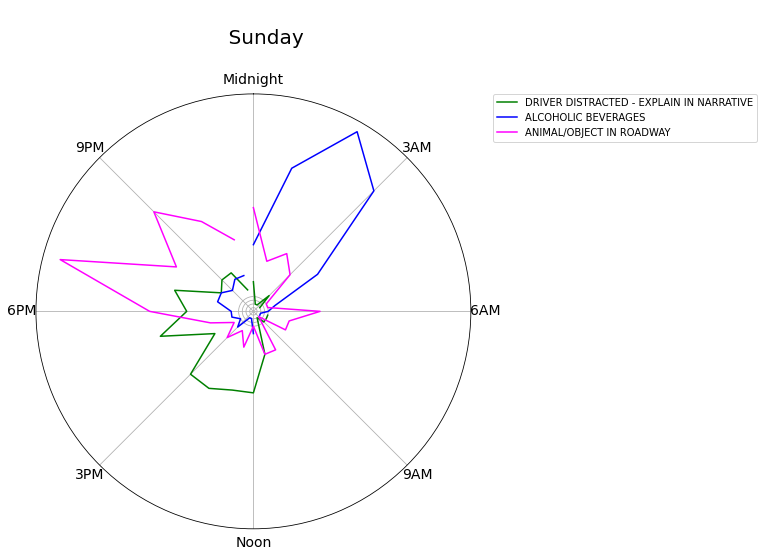

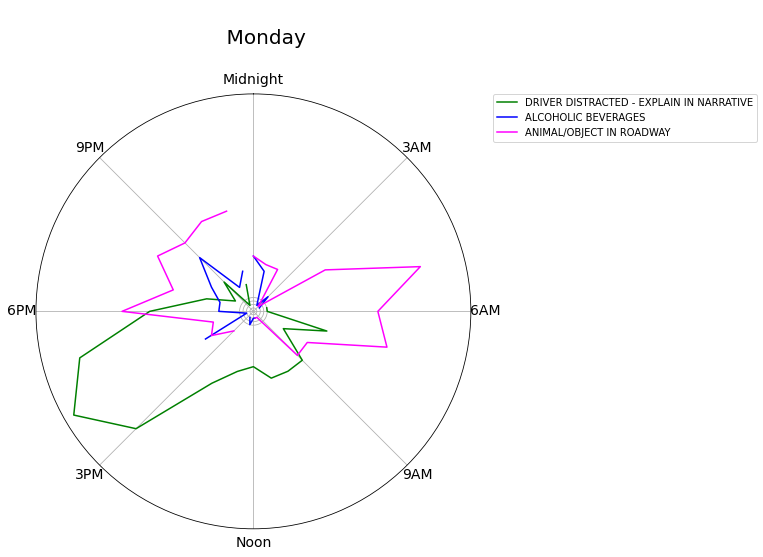

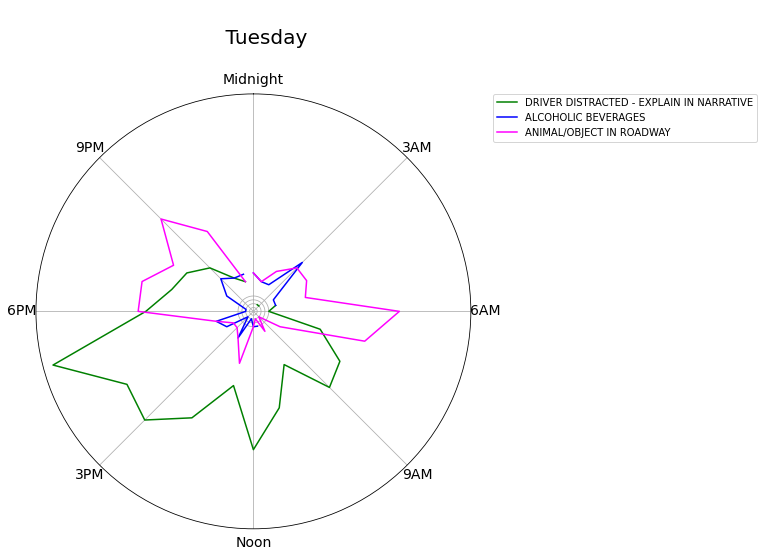

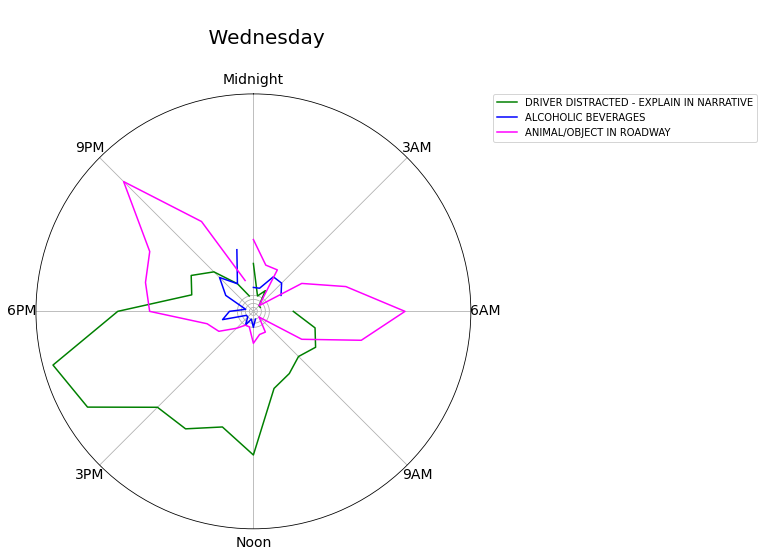

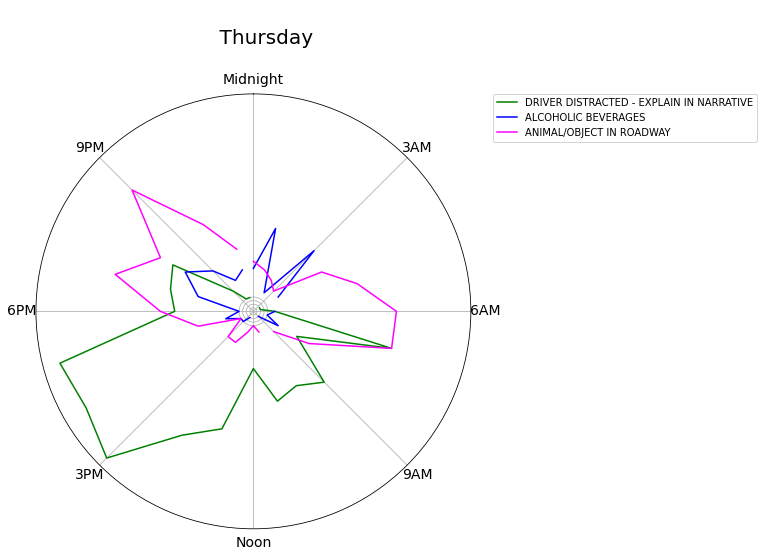

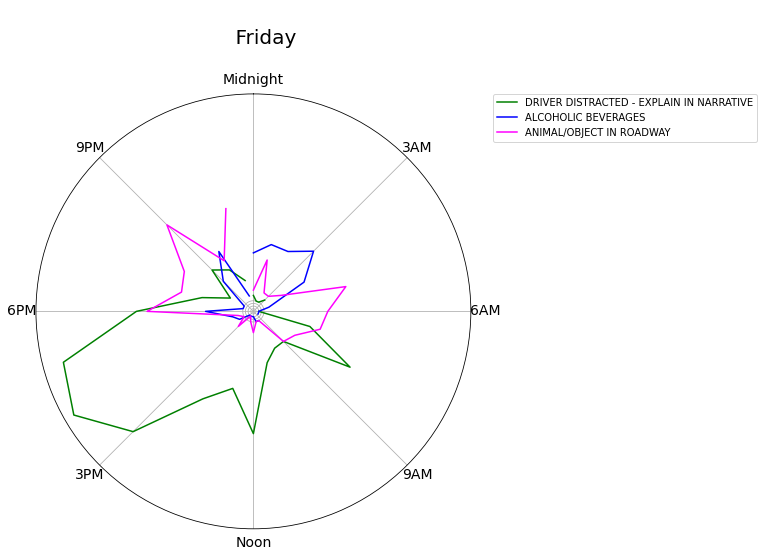

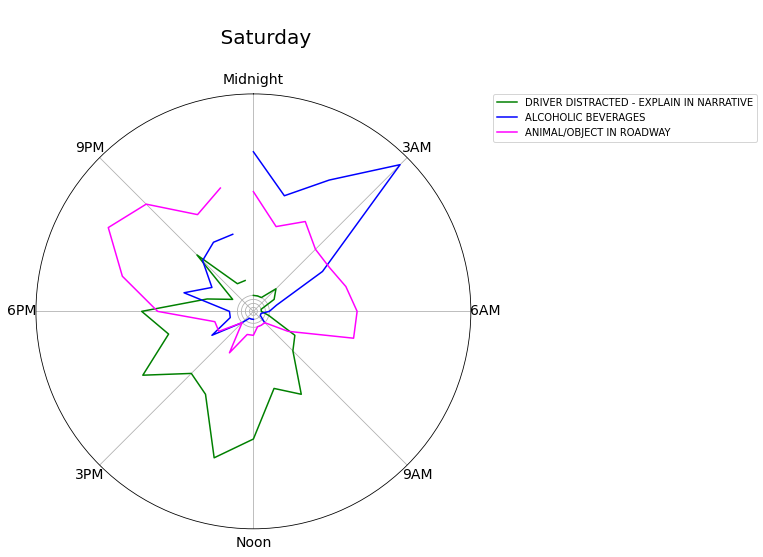

In [8]:
# Setting aside items to be iterated through
days = [1, 2, 3, 4, 5, 6, 7]
day_labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_index = 0
factors2 = ["DRIVER DISTRACTED - EXPLAIN IN NARRATIVE", "ALCOHOLIC BEVERAGES", "ANIMAL/OBJECT IN ROADWAY"]
colors = ["green", "blue", "magenta"] # https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# Creating a dataframe that will be merged to avoid dropping NaN values 
hours = df["Hour"].unique() 
hours.sort()
hours_df = pd.DataFrame(hours)
hours_df.rename(columns={0: "index"}, inplace=True)

# Initiating loop to produce 7 different graphs for the days 
for day in days: 
    i = 0  
    fig = plt.figure() # initiate a new figure 
    day_df = df.loc[df["Day"] == day]
    
    # Initiating loop to map the multiple primary factos at play 
    for factor in factors2:
        # Organizing info for r
        factor_df = day_df.loc[day_df["Primary Factor"] == factor, ["Hour", "Master Record Number"]]
        accidents_count_df = pd.DataFrame(factor_df["Hour"].value_counts()).reset_index()
        hour_accidents_df = pd.merge(hours_df, accidents_count_df, how="left", on="index")
      
        # Setting theta and r 
        theta = (np.arange(0,2400,step=100)/2400) * 360 * (math.pi/180) # convert to radians manually, where midnight is 0 degrees
        r = hour_accidents_df["Hour"]
        
        # Plot the line 
        ax = fig.add_subplot(111, projection='polar')
        ax.plot(theta, r, c=colors[i], label=factor)
        ax.grid(True)
        i += 1 
        
    # Labeling the plot 
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xticklabels(['Midnight', '3AM', '6AM', '9AM', 'Noon', '3PM', '6PM', '9PM'], fontsize=14)
    ax.set_theta_zero_location("N")  # theta=0 at the top, https://stackoverflow.com/questions/49805975/how-do-you-reverse-the-axis-and-set-the-zero-position-for-a-polar-plot-in-matplo
    ax.set_theta_direction(-1)  # theta increasing clockwise
    ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
    ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line

    # Fixing legend 
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    for lh in leg.legendHandles: 
        lh.set_alpha(1) # increasing opacity for the legend, https://stackoverflow.com/questions/12848808/set-legend-symbol-opacity-with-matplotlib
    # Finishing with a dynamic title
    plt.title(f"""
    {day_labels[day_index]}
    """, fontsize=20)
    day_index += 1 
    
plt.show()